# Linear Regression Model: Student performance

   The Model aims to predict the final grades of students based on a variety of factors.

## Pseudocodes

1. Open the data description, to understand the data.
2. Tidy the data:

a. import libraies and data.

b. check and handle the following abnormalities:

- missing values.
- Outliers
- skewness
- Non usable variables.
- handle categorical data column, using the "one-Hot encoding style"
- correlation check

3. Use the set up the linear regression model using the eqn: "Y wX + b"
4. Train-test the model
5. Validate the performance and accuracy of the model by use of the:

- r_2 score.
- Mean square error.
6. Resolve the model accuracy using the following methods:

- Ridge.
- Elasticnet.
- Lasso.
7. Document our model.
 
 ## Data Description
  

In [1]:
file = open("data_description.txt",'r')
print(file.read())

1. StudentID: Unique identifier for each student
2. school: Student's school ('GP' - Gombe Prime or 'MS' - Methodist School)
3. sex: Student's sex ('F' - female or 'M' - male)
4. age: Student's age (numeric: from 15 to 22)
5. address: Student's home address type ('U' - urban or 'R' - rural)
6. famsize: Family size ('LE3' - less than or equal to 3 or 'GT3' - greater than 3)
7. pstatus: Parent's cohabitation status ('T' - living together or 'A' - apart)
8. medu: Mother's education level (categorical)
9. fedu: Father's education level (categorical)
10. mjob: Mother's occupation
11. fjob: Father's occupation
12. reason: Reason for choosing the school
13. guardian: Student's guardian ('mother', 'father', or 'other')
14. traveltime: Home to school travel time (numeric: 1 - less than 15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, or 4 - more than 1 hour)
15. studytime: Weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours)
16. failu

## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("student_performance.csv")

In [4]:
data.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,745263,GP,F,18,R,GT3,A,Tertiary education,Secondary education,other,...,4,1,1,1,1,very good,15,12.0,9.0,10
1,174740,MS,F,17,U,GT3,T,Tertiary education,Secondary education,at_home,...,4,3,3,2,2,very bad,5,9.0,NaN,11
2,308261,GP,F,15,U,LE3,T,Tertiary education,Secondary education,services,...,4,4,4,1,1,very good,4,12.0,11.0,11
3,337549,MS,F,17,U,GT3,T,Secondary education,Secondary education,other,...,4,5,3,1,1,very good,4,9.0,9.0,10
4,318969,GP,F,17,U,GT3,T,Postgraduate education,Postgraduate education,other,...,4,2,1,1,1,good,0,13.0,13.0,13


In [5]:
data.shape

(544, 34)

In [6]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,541.000000,541.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.632163,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.711007,5.511570,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     540 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        539 non-null    object 
 19  activities  544 non-null    o

# Abnormalities Check

## Missing Values:
Observing the data above at "data.describe()" table - count row, and also the "data.info"  table- Non_null count column. it can the seen tha the folowing data columns have been spotted tonhave missing values, because they do not have a values up to "544"

1. famsize.
2. paid.
3. G1.
4. G2.

Now the missing values of these data columns i.e G1 and G2  will be filled using mean because they are numerical data, while the famsize and paid data columns will be filled using mode because they are categorical data.

In [8]:
#calculating for mean for G1 and G2:
G1 = data["G1"]
G2 = data["G2"]

In [9]:
G1.mean()

11.24029574861368

In [10]:
G2.mean()

11.632162661737523

In [11]:
#fiiling in missing value with the mean(G1 and G2):
data.G1 = data.G1.fillna(data.G1.mean())
data.G2 = data.G2.fillna(data.G2.mean())

In [12]:
#Using Mode to fill in famsize:
famsize = data["famsize"]
famsize.mode()[0]
data['famsize'] = data['famsize'].fillna(data.famsize.mode()[0])

In [13]:
#Using Mode to fill in paid:
paid = data["paid"]
paid.mode()[0]
data['paid'] = data['paid'].fillna(data.paid.mode()[0])

In [14]:
#Check to see all missing values data columns have been updated:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    int64  
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    int64  
 4   address     544 non-null    object 
 5   famsize     544 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    int64  
 14  studytime   544 non-null    int64  
 15  failures    544 non-null    int64  
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        544 non-null    object 
 19  activities  544 non-null    o

In [15]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,545647.773897,17.121324,1.577206,1.904412,0.220588,4.003676,3.198529,3.181985,1.509191,2.283088,3.738971,11.240296,11.632163,11.757353
std,260288.577310,6.399815,0.763771,0.813140,0.581370,2.198272,1.072474,1.269404,0.955698,1.296265,4.790440,2.703508,5.496324,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,150.000000,4.000000,4.000000,3.000000,50.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,120.000000,19.000000


## Outliers
 From the above data, it is observedthat the following data coulumns contains possible outliers due to the inregularity in their numbers:

1. age
2. famrel
3. goout
4. absences
5. G2

NB.the following data  columns will checked for Using Jointplot with "Grade" on my X-axis because the grade column has a linera and progressive data values.
  Also the outliers will be handled using 99th or one percentile, depending weather its a upper or lower value outlier.


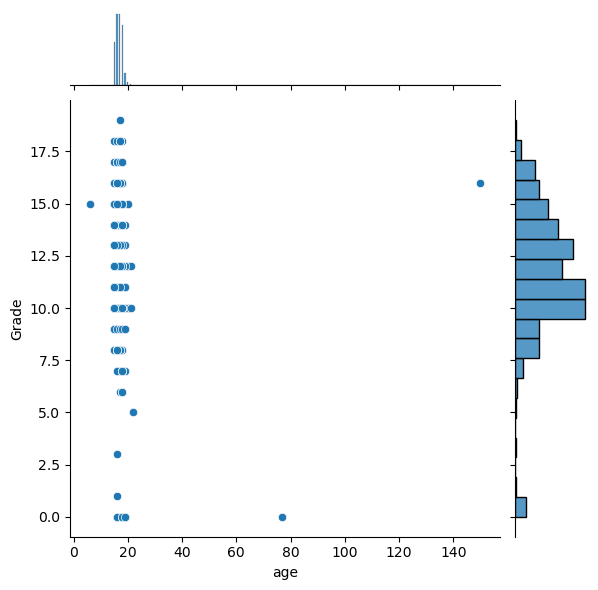

In [16]:
#For age:
sns.jointplot(x='age', y='Grade', data=data)

In [17]:
# Outlier found and will handled using 99th percentile since its an upper value outlier:
np.percentile(data.age,[99])[0]

20.0

In [18]:
uv=np.percentile(data.age,[99])[0]

In [1]:
outliers = []
data detect_outliers_zscore(age):
    thres = 3
    mean = np.mean(age)
    std = np.std(age)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

SyntaxError: invalid syntax (3741150538.py, line 2)

In [19]:
data[(data.age>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
45,567281,GP,M,150,U,GT3,A,Tertiary education,Postgraduate education,services,...,5,4,4,1,1,very bad,0,16.0,16.0,16
232,584963,MS,F,77,U,GT3,T,Postgraduate education,Secondary education,teacher,...,5,5,5,1,3,very good,0,8.0,8.0,0
285,730271,GP,F,21,U,LE3,T,Postgraduate education,Postgraduate education,other,...,3,3,2,1,1,very good,0,9.0,12.0,12
336,658986,GP,M,22,U,GT3,T,Tertiary education,Primary education,services,...,5,4,5,5,5,very bad,12,7.0,8.0,5
524,398356,GP,M,21,R,LE3,T,Primary education,Primary education,at_home,...,5,3,3,5,2,good,21,9.0,10.0,10


In [20]:
data.age[(data.age> 3*uv)] = 3*uv

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2652266980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age> 3*uv)] = 3*uv


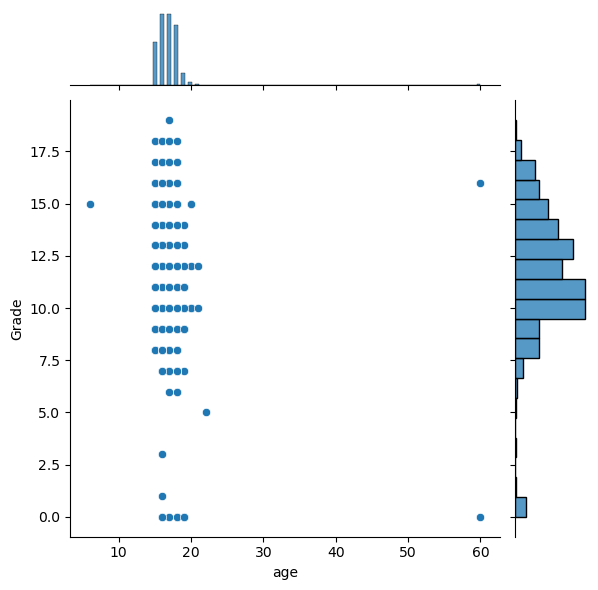

In [21]:
# check if outlier is resolved:
sns.jointplot(x='age', y='Grade', data=data)

 Outlier has been handled, as it can be observed that the value has been brought closer its peers values.

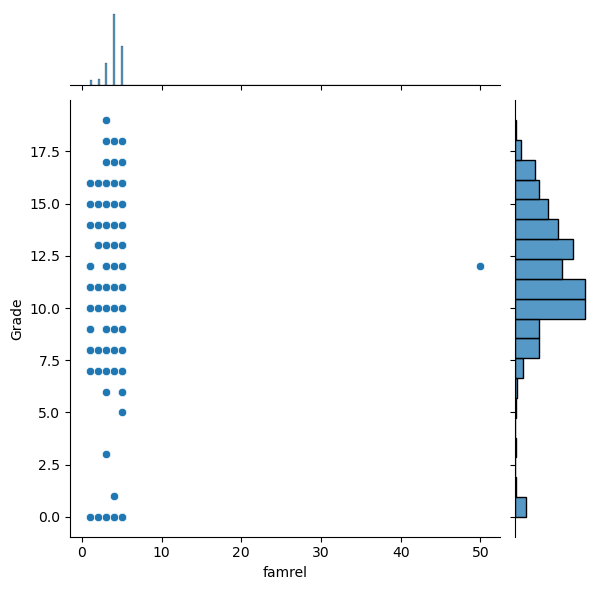

In [22]:
# for famrel:
sns.jointplot(x='famrel', y='Grade', data=data)

In [23]:
# Outlier found and will handled using 99th percentile since its an upper value outlier:
np.percentile(data.famrel,[99])[0]

5.0

In [24]:
uv=np.percentile(data.famrel,[99])[0]

In [25]:
data[(data.famrel>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
543,123247,GP,M,15,U,GT3,T,Postgraduate education,Postgraduate education,services,...,50,3,3,1,1,very good,2,12.0,13.0,12


In [26]:
data.famrel[(data.famrel> 3*uv)] = 3*uv

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1197172008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.famrel[(data.famrel> 3*uv)] = 3*uv


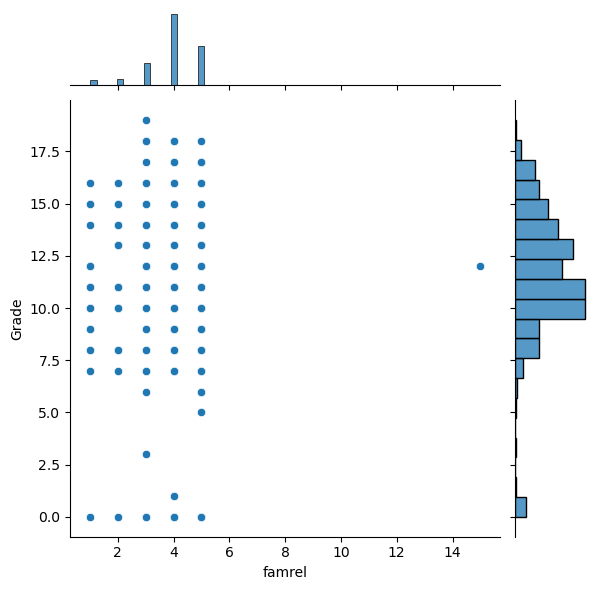

In [27]:
# Check if outlier is handled:
sns.jointplot(x='famrel', y='Grade', data=data)

Outlier for famrel has been handled, as it can be observed that the value has been brought closer its peers values.

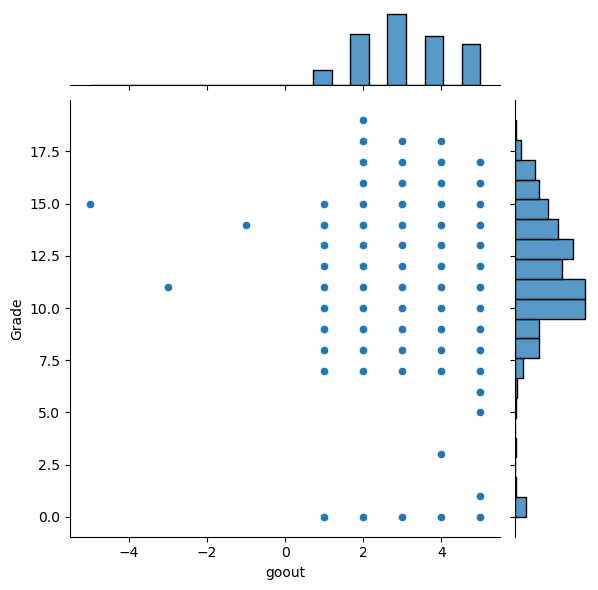

In [28]:
#for goout:
sns.jointplot(x='goout', y='Grade', data=data)

In [29]:
# Outlier found and will handled using one  percentile since its a lower value outlier:
np.percentile(data.goout,[1])[0]

1.0

In [30]:
lv=np.percentile(data.goout,[1])[0]

In [31]:
data[(data.goout>lv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
1,174740,MS,F,17,U,GT3,T,Tertiary education,Secondary education,at_home,...,4,3,3,2,2,very bad,5,9.0,11.632163,11
2,308261,GP,F,15,U,LE3,T,Tertiary education,Secondary education,services,...,4,4,4,1,1,very good,4,12.0,11.000000,11
3,337549,MS,F,17,U,GT3,T,Secondary education,Secondary education,other,...,4,5,3,1,1,very good,4,9.0,9.000000,10
5,922352,GP,F,16,U,GT3,T,Secondary education,Secondary education,other,...,5,2,3,1,3,average,1,13.0,13.000000,13
6,721820,MS,F,17,U,GT3,T,Postgraduate education,Tertiary education,teacher,...,5,5,4,1,1,very bad,0,6.0,9.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,672843,GP,M,15,U,GT3,T,Postgraduate education,Secondary education,other,...,3,3,3,1,1,average,0,11.0,9.000000,10
540,633556,GP,F,15,U,GT3,T,Secondary education,Secondary education,other,...,5,1,2,1,1,average,4,10.0,10.000000,10
541,722794,GP,M,16,U,GT3,T,Postgraduate education,Postgraduate education,services,...,5,3,2,1,2,very good,4,14.0,15.000000,15
542,650929,MS,F,15,R,LE3,T,Primary education,Primary education,at_home,...,5,4,3,1,2,good,0,10.0,10.000000,10


In [32]:
data.goout[(data.goout<0.3*lv)] = 0.3*lv

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2497018387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.goout[(data.goout<0.3*lv)] = 0.3*lv


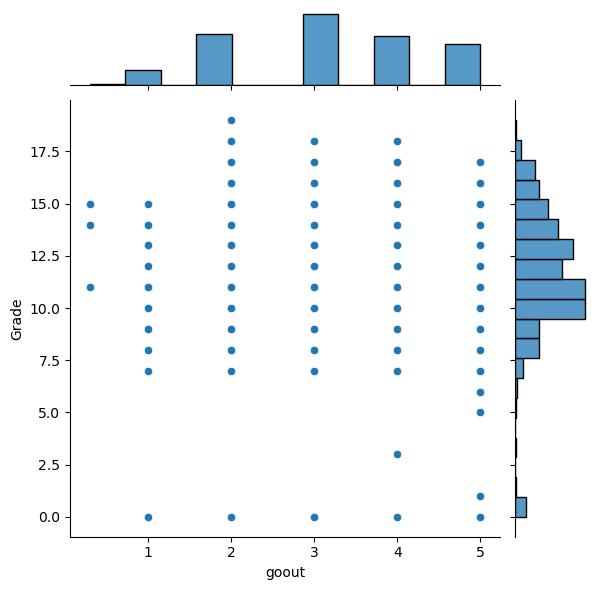

In [33]:
#for check:
sns.jointplot(x='goout', y='Grade', data=data)

Outlier for the lowwer value of goout has been handled as observed in the plot above.

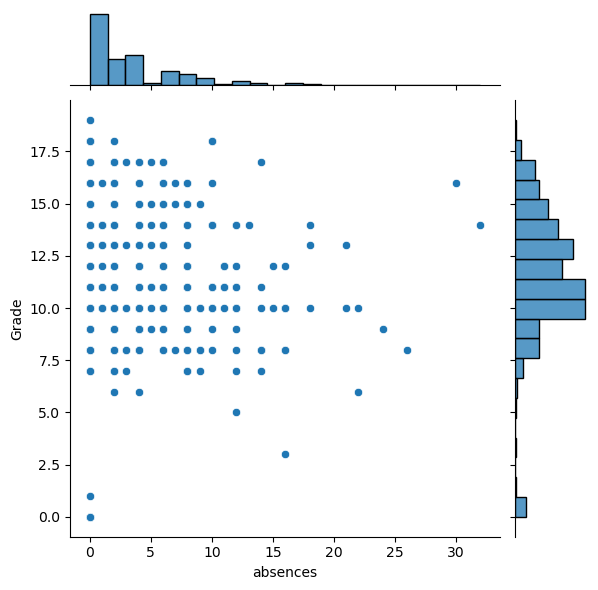

In [34]:
#For absences:
sns.jointplot(x='absences', y='Grade', data=data)

From the plot abojve, No outliers was observed in goout. 

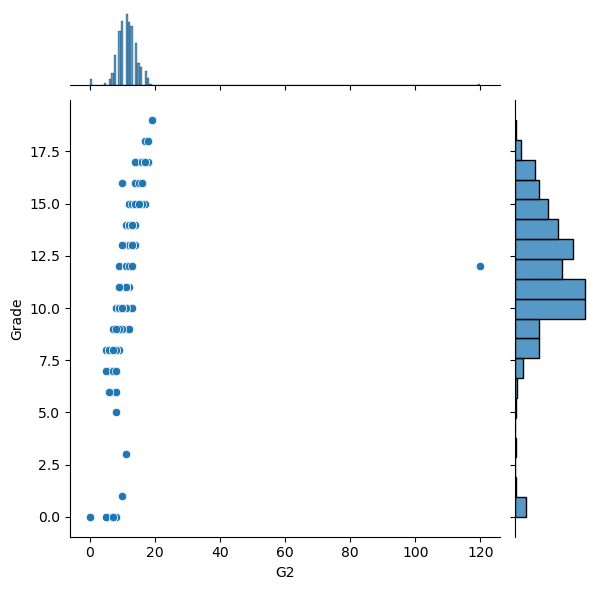

In [35]:
#For G2:
sns.jointplot(x='G2', y='Grade', data=data)

In [36]:
# Outlier found and will handled using 99th percentile since its an upper value outlier:
np.percentile(data.G2,[99])[0]

18.0

In [37]:
uv=np.percentile(data.G2,[99])[0]

In [38]:
data[(data.G2>uv)]

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
64,168148,GP,M,15,U,GT3,A,Postgraduate education,Postgraduate education,other,...,1,3,3.0,5,5,average,0,11.0,120.0,12
164,628787,GP,F,17,R,LE3,T,Tertiary education,Primary education,services,...,3,1,2.0,1,1,average,0,18.0,19.0,19


In [39]:
data.G2[(data.G2>3*uv)] = 3*uv

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\4113184369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.G2[(data.G2>3*uv)] = 3*uv


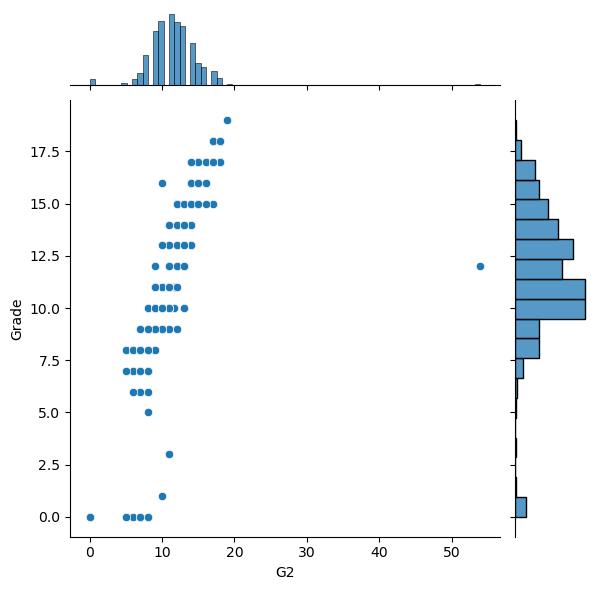

In [40]:
#Check:
sns.jointplot(x='G2', y='Grade', data=data)

To be honest i dont know why my plot looks so, bescause i slept and woke up to it so. don't know what i pressed on my keyboard. Although from the table below, it can be observed that the Outlier has actually been handled for G2 column using the 99th percentile method.

In [41]:
#General check for handled abnormalities in the data:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,545647.773897,16.924632,1.577206,1.904412,0.220588,3.939338,3.198529,3.200184,1.509191,2.283088,3.738971,11.240296,11.510839,11.757353
std,260288.577310,2.927582,0.763771,0.813140,0.581370,1.074566,1.072474,1.196273,0.955698,1.296265,4.790440,2.703508,3.445775,3.274425
min,104000.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.300000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,314137.000000,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,0.000000,9.000000,10.000000,10.000000
50%,546997.000000,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,764553.750000,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,999684.000000,60.000000,4.000000,4.000000,3.000000,15.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,54.000000,19.000000


## skewness

Skewness is going to be handled for all 12 numerical data in the dataset using displot and appropriate methods according to the skewed data curve.
  this methods are either of the following:
  
1. log X
2. log(1+X)
3. sqrt X
4. from scipy.stats import boxcox

pd.Series(boxcox(data['X'])[0].tolist()).describe()

where X represent the respect data column we are handling skewness for.

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2494309654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.StudentID,  hist=True, kde=True)


<Axes: ylabel='Density'>

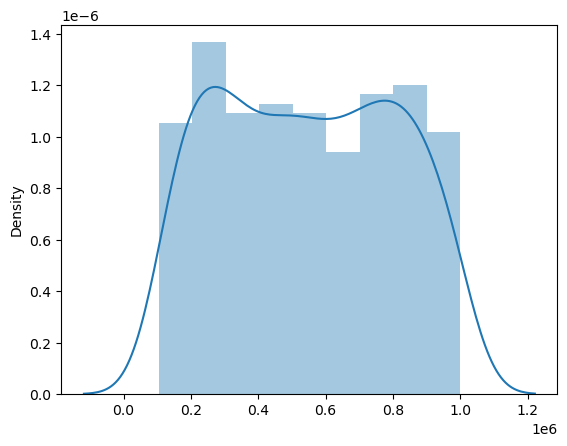

In [42]:
#For StudentID:
sns.distplot(x =data.StudentID,  hist=True, kde=True)

In [43]:
data.StudentID.describe()

count       544.000000
mean     545647.773897
std      260288.577310
min      104000.000000
25%      314137.000000
50%      546997.000000
75%      764553.750000
max      999684.000000
Name: StudentID, dtype: float64

In [44]:
np.log(data.StudentID).describe()

count    544.000000
mean      13.064059
std        0.582686
min       11.552146
25%       12.657584
50%       13.212198
75%       13.547047
max       13.815195
Name: StudentID, dtype: float64

In [45]:
data.StudentID = np.log(data.StudentID)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1420039391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.StudentID,  hist=True, kde=True)


<Axes: ylabel='Density'>

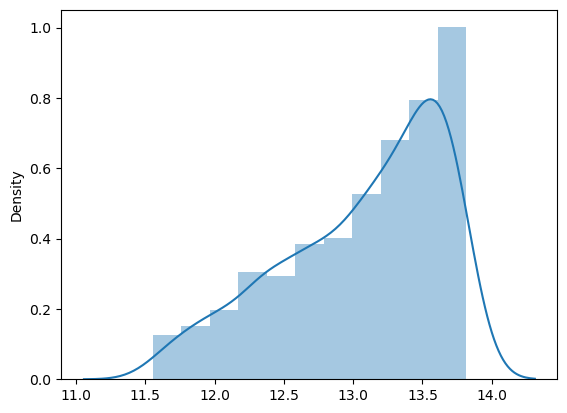

In [46]:
sns.distplot(x =data.StudentID,  hist=True, kde=True)

From the plot above Skeweness has been handled for the StudentID column using "Log X"

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3734238000.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.age,  hist=True, kde=True)


<Axes: ylabel='Density'>

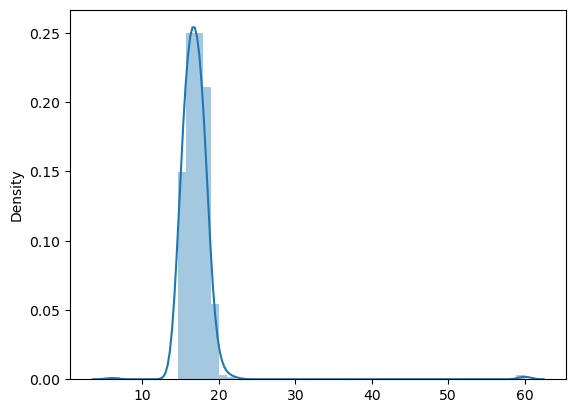

In [47]:
#for age:
sns.distplot(x =data.age,  hist=True, kde=True)

In [48]:
data.age.describe()

count    544.000000
mean      16.924632
std        2.927582
min        6.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       60.000000
Name: age, dtype: float64

In [49]:
np.sqrt(data.age).describe()

count    544.000000
mean       4.104720
std        0.275764
min        2.449490
25%        4.000000
50%        4.123106
75%        4.242641
max        7.745967
Name: age, dtype: float64

In [50]:
data.age=np.sqrt(data.age)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\756891426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.age,  hist=True, kde=True)


<Axes: ylabel='Density'>

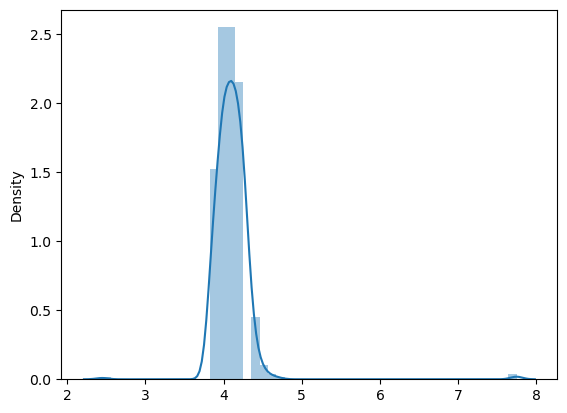

In [51]:
#check:
sns.distplot(x =data.age,  hist=True, kde=True)

From the plot above Skeweness has been handled for the age column using "sqrt X"

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1611521908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.traveltime,  hist=True, kde=True)


<Axes: ylabel='Density'>

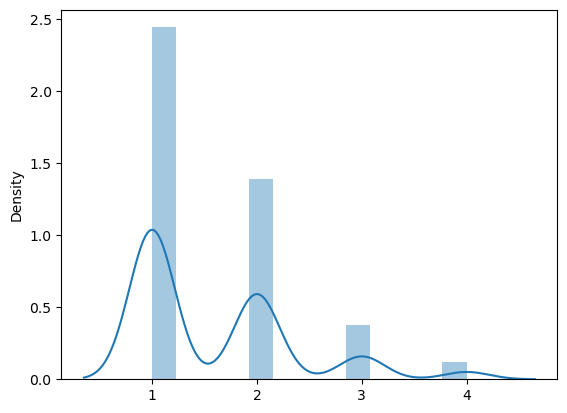

In [52]:
#For traveltime:
sns.distplot(x =data.traveltime,  hist=True, kde=True)

In [53]:
data.traveltime.describe()

count    544.000000
mean       1.577206
std        0.763771
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [54]:
np.log(data.traveltime).describe()

count    544.000000
mean       0.356121
std        0.430516
min        0.000000
25%        0.000000
50%        0.000000
75%        0.693147
max        1.386294
Name: traveltime, dtype: float64

In [55]:
np.log(1+data.StudentID).describe()

count    544.000000
mean       2.642747
std        0.042097
min        2.529892
25%        2.614295
50%        2.654101
75%        2.677388
max        2.695653
Name: StudentID, dtype: float64

In [56]:
np.sqrt(data.traveltime).describe()

count    544.000000
mean       1.224069
std        0.281079
min        1.000000
25%        1.000000
50%        1.000000
75%        1.414214
max        2.000000
Name: traveltime, dtype: float64

In [57]:
data.traveltime=np.sqrt(data.traveltime)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3638319508.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.traveltime,  hist=True, kde=True)


<Axes: ylabel='Density'>

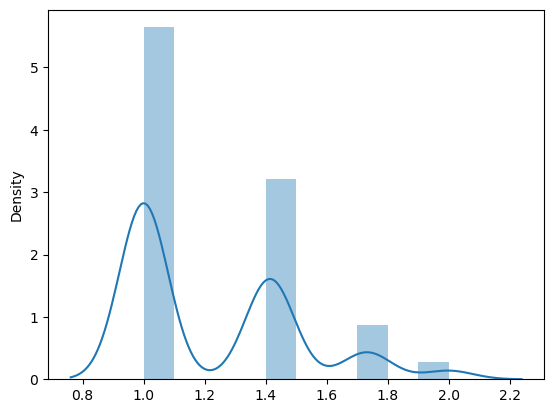

In [58]:
#Check:
sns.distplot(x =data.traveltime,  hist=True, kde=True)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1995048129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.studytime,  hist=True, kde=True)


<Axes: ylabel='Density'>

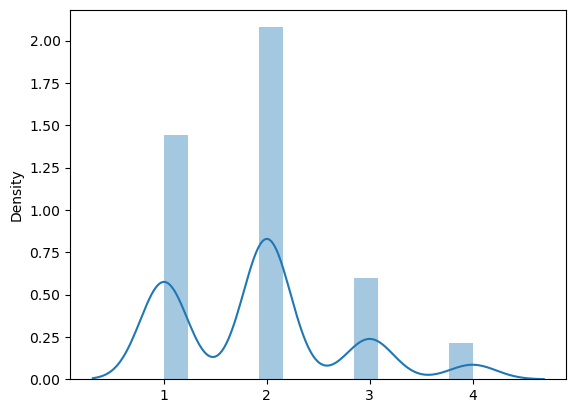

In [59]:
#for studytime:
sns.distplot(x =data.studytime,  hist=True, kde=True)

In [60]:
data.studytime.describe()

count    544.000000
mean       1.904412
std        0.813140
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [61]:
np.sqrt(data.studytime).describe()

count    544.000000
mean       1.349290
std        0.289799
min        1.000000
25%        1.000000
50%        1.414214
75%        1.414214
max        2.000000
Name: studytime, dtype: float64

In [62]:
data.studytime=np.sqrt(data.studytime)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3522616901.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.studytime,  hist=True, kde=True)


<Axes: ylabel='Density'>

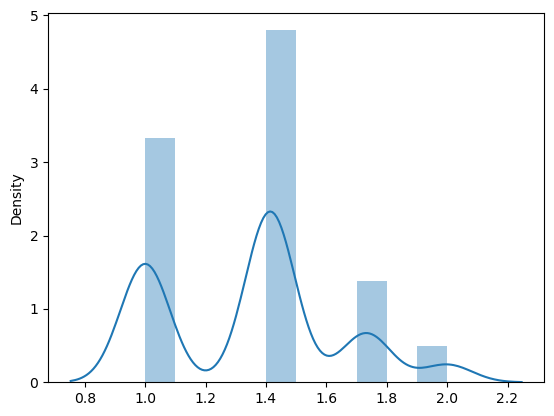

In [63]:
sns.distplot(x =data.studytime,  hist=True, kde=True)

Skewness handled for studytime using the "sqrt X"

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2685668670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.failures,  hist=True, kde=True)


<Axes: ylabel='Density'>

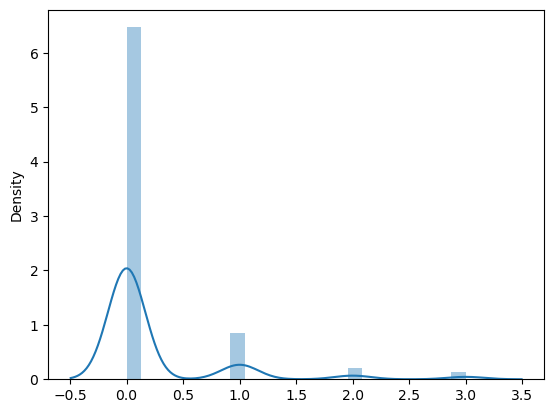

In [64]:
#For failures:
sns.distplot(x =data.failures,  hist=True, kde=True)

In [65]:
data.failures.describe()

count    544.000000
mean       0.220588
std        0.581370
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [66]:
np.log(1 + data.failures).describe()

count    544.000000
mean       0.132226
std        0.322965
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.386294
Name: failures, dtype: float64

In [67]:
np.sqrt(data.failures).describe()

count    544.000000
mean       0.181128
std        0.433736
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.732051
Name: failures, dtype: float64

In [68]:
data.failures=np.log(1 + data.failures)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2685668670.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.failures,  hist=True, kde=True)


<Axes: ylabel='Density'>

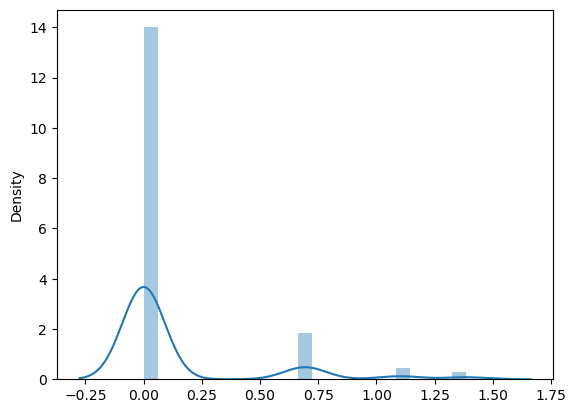

In [69]:
#For failures:
sns.distplot(x =data.failures,  hist=True, kde=True)

Now after testing all methods for handling skewenss in this data, log(1+X) and sqrt X gave the same values while the rest giave an error due zero digits, so picked one of the two. in this case log(1+)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\125961580.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.famrel,  hist=True, kde=True)


<Axes: ylabel='Density'>

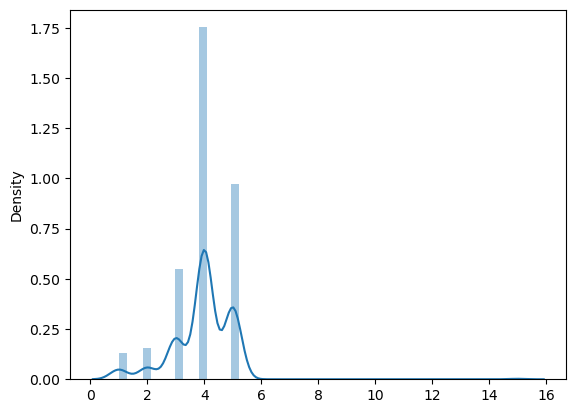

In [70]:
#for famrel:
sns.distplot(x =data.famrel,  hist=True, kde=True)

In [71]:
data.famrel.describe()

count    544.000000
mean       3.939338
std        1.074566
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       15.000000
Name: famrel, dtype: float64

In [72]:
np.sqrt(data.famrel).describe()

count    544.000000
mean       1.963685
std        0.288850
min        1.000000
25%        2.000000
50%        2.000000
75%        2.236068
max        3.872983
Name: famrel, dtype: float64

In [73]:
data.famrel=np.sqrt(data.famrel)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2746918385.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.famrel,  hist=True, kde=True)


<Axes: ylabel='Density'>

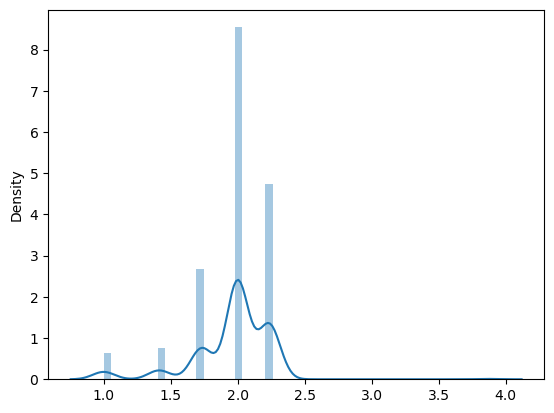

In [74]:
#check:
sns.distplot(x =data.famrel,  hist=True, kde=True)

Skewness handled using the Sqrt X method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1489346875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.freetime,  hist=True, kde=True)


<Axes: ylabel='Density'>

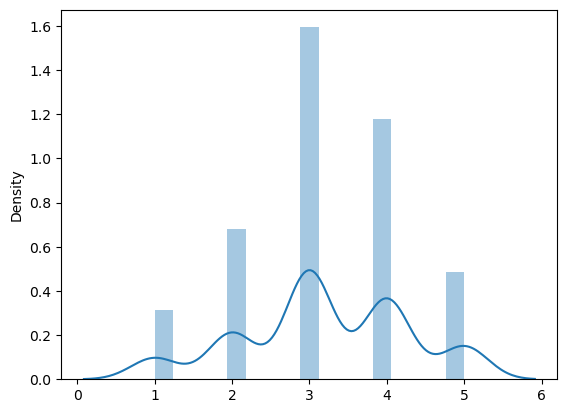

In [75]:
#For freetime:
sns.distplot(x =data.freetime,  hist=True, kde=True)

In [76]:
data.freetime.describe()

count    544.000000
mean       3.198529
std        1.072474
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [77]:
np.sqrt(data.freetime).describe()

count    544.000000
mean       1.759212
std        0.322327
min        1.000000
25%        1.732051
50%        1.732051
75%        2.000000
max        2.236068
Name: freetime, dtype: float64

In [78]:
data.freetime=np.sqrt(data.freetime)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1867451957.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.freetime,  hist=True, kde=True)


<Axes: ylabel='Density'>

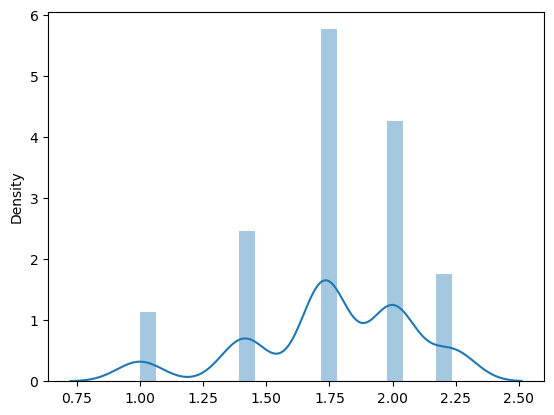

In [79]:
#Check:
sns.distplot(x =data.freetime,  hist=True, kde=True)

Skewness handled using the Sqrt X method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\396741736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.goout,  hist=True, kde=True)


<Axes: ylabel='Density'>

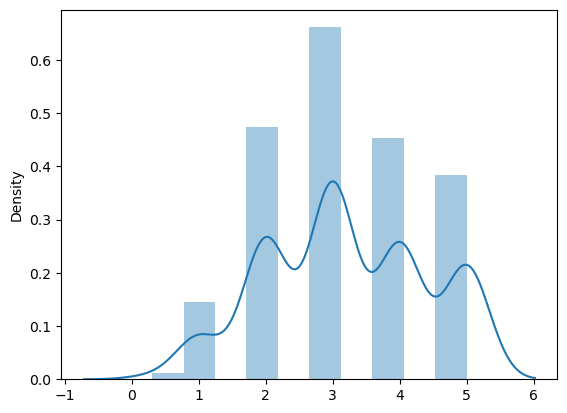

In [80]:
#For goout:
sns.distplot(x =data.goout,  hist=True, kde=True)

In [81]:
data.goout.describe()

count    544.000000
mean       3.200184
std        1.196273
min        0.300000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [82]:
np.log(1 + data.goout).describe()

count    544.000000
mean       1.389589
std        0.313778
min        0.262364
25%        1.098612
50%        1.386294
75%        1.609438
max        1.791759
Name: goout, dtype: float64

In [83]:
data.goout= np.log(1+data.goout)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3914322171.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.goout,  hist=True, kde=True)


<Axes: ylabel='Density'>

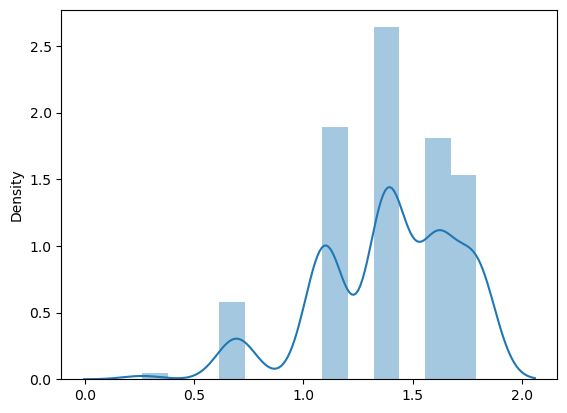

In [84]:
#check:
sns.distplot(x =data.goout,  hist=True, kde=True)

Skewness handled using log(1+X) method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1175562549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Dalc,  hist=True, kde=True)


<Axes: ylabel='Density'>

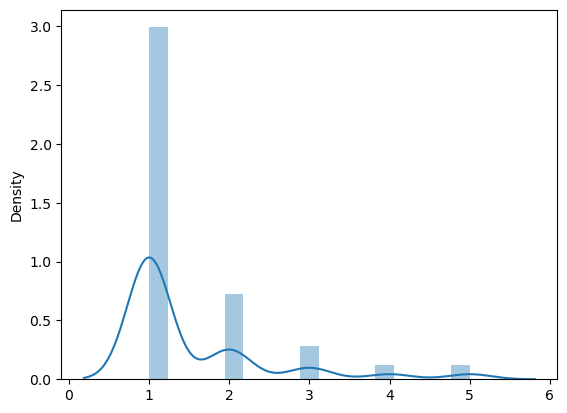

In [85]:
#For Dalc:
sns.distplot(x =data.Dalc,  hist=True, kde=True)

In [86]:
data.Dalc.describe()

count    544.000000
mean       1.509191
std        0.955698
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Dalc, dtype: float64

In [87]:
np.log(1 + data.Dalc).describe()

count    544.000000
mean       0.867596
std        0.299709
min        0.693147
25%        0.693147
50%        0.693147
75%        1.098612
max        1.791759
Name: Dalc, dtype: float64

In [88]:
data.Dalc=np.log(1+data.Dalc)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\1820874602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Dalc,  hist=True, kde=True)


<Axes: ylabel='Density'>

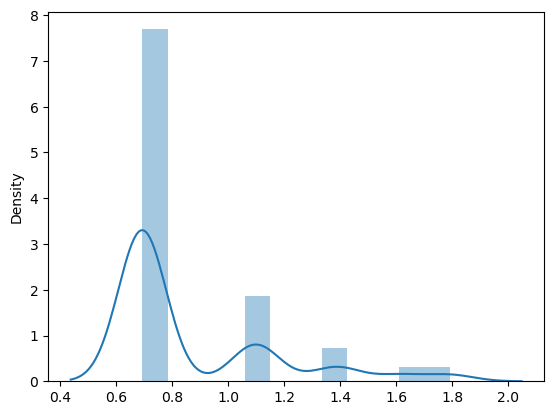

In [89]:
#check:
sns.distplot(x =data.Dalc,  hist=True, kde=True)

Skewness handled using log(1+X) method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\4032702521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Walc,  hist=True, kde=True)


<Axes: ylabel='Density'>

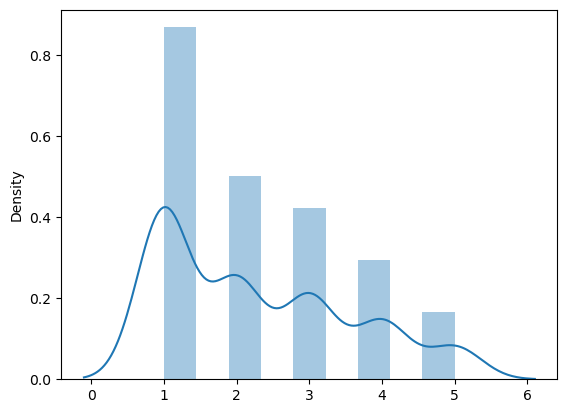

In [90]:
#For Walc:
sns.distplot(x =data.Walc,  hist=True, kde=True)

In [91]:
data.Walc.describe()

count    544.000000
mean       2.283088
std        1.296265
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Walc, dtype: float64

In [92]:
np.log(1 + data.Walc).describe()

count    544.000000
mean       1.113668
std        0.385243
min        0.693147
25%        0.693147
50%        1.098612
75%        1.386294
max        1.791759
Name: Walc, dtype: float64

In [93]:
data.Walc=np.log(1+data.Walc)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\262251081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Walc,  hist=True, kde=True)


<Axes: ylabel='Density'>

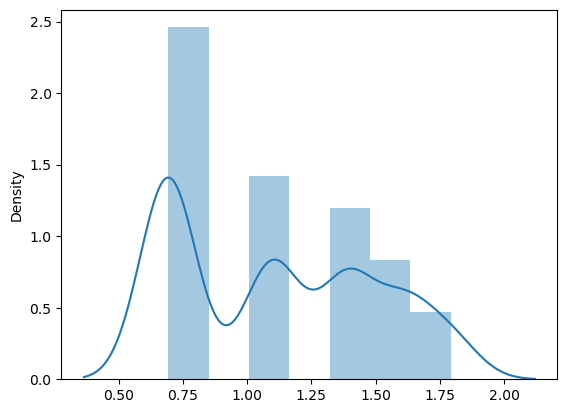

In [94]:
#Check:
sns.distplot(x =data.Walc,  hist=True, kde=True)

Skewness handled using log(1+x) method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3309252521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.absences,  hist=True, kde=True)


<Axes: ylabel='Density'>

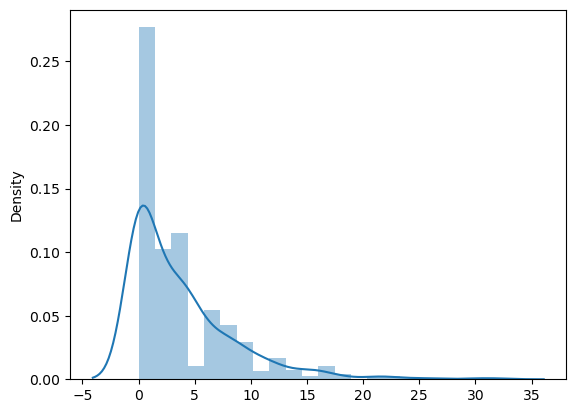

In [95]:
#For absences:
sns.distplot(x =data.absences,  hist=True, kde=True)

In [96]:
data.absences.describe()

count    544.000000
mean       3.738971
std        4.790440
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [97]:
np.log(1 + data.absences).describe()

count    544.000000
mean       1.093622
std        0.976860
min        0.000000
25%        0.000000
50%        1.098612
75%        1.945910
max        3.496508
Name: absences, dtype: float64

In [98]:
np.sqrt(data.absences).describe()

count    544.000000
mean       1.424202
std        1.309110
min        0.000000
25%        0.000000
50%        1.414214
75%        2.449490
max        5.656854
Name: absences, dtype: float64

In [99]:
data.absences=np.log(1+data.absences) 

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2109272253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.absences,  hist=True, kde=True)


<Axes: ylabel='Density'>

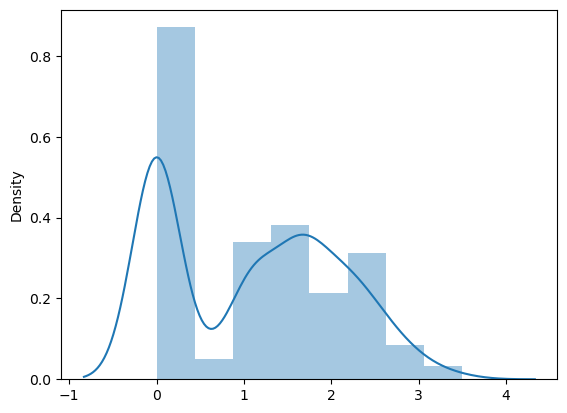

In [100]:
#check:
sns.distplot(x =data.absences,  hist=True, kde=True)

Skewness handled using the log(1+x) method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2296391140.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G1,  hist=True, kde=True)


<Axes: ylabel='Density'>

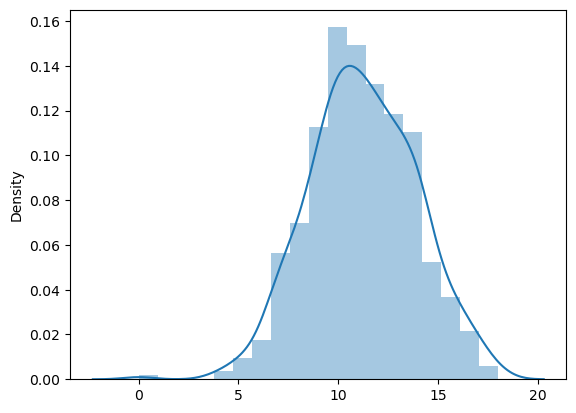

In [101]:
#For G1:
sns.distplot(x =data.G1,  hist=True, kde=True)

In [102]:
data.G1.describe()

count    544.000000
mean      11.240296
std        2.703508
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       18.000000
Name: G1, dtype: float64

In [103]:
np.log(1 + data.G1).describe()

count    544.000000
mean       2.476742
std        0.252730
min        0.000000
25%        2.302585
50%        2.484907
75%        2.639057
max        2.944439
Name: G1, dtype: float64

In [104]:
data.G1= np.log(1+data.G1)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3292514994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G1,  hist=True, kde=True)


<Axes: ylabel='Density'>

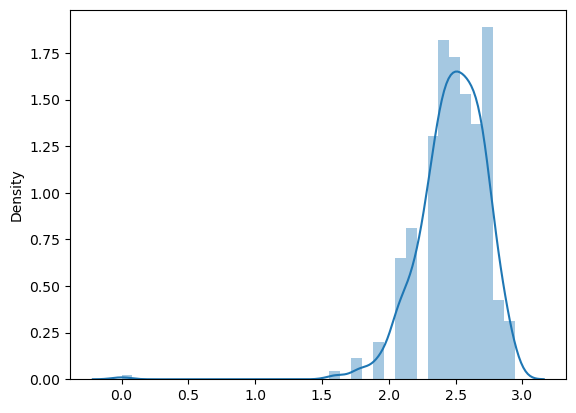

In [105]:
sns.distplot(x =data.G1,  hist=True, kde=True)

Skewness handled usong Log(1+X) method 

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2996551176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G2,  hist=True, kde=True)


<Axes: ylabel='Density'>

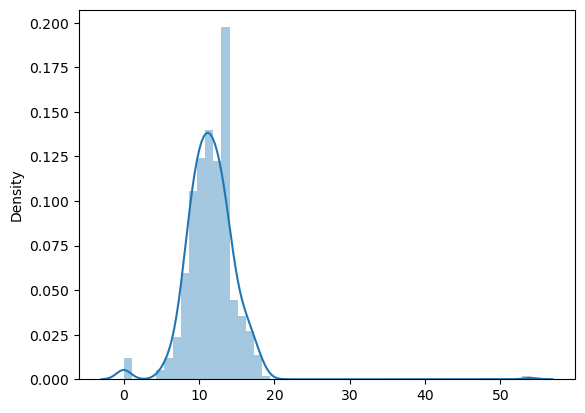

In [106]:
#For G2:
sns.distplot(x =data.G2,  hist=True, kde=True)

In [107]:
data.G2.describe()

count    544.000000
mean      11.510839
std        3.445775
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       54.000000
Name: G2, dtype: float64

In [108]:
np.log(1 + data.G2).describe()

count    544.000000
mean       2.480225
std        0.360508
min        0.000000
25%        2.397895
50%        2.484907
75%        2.639057
max        4.007333
Name: G2, dtype: float64

In [109]:
data.G1=np.sqrt(data.G1)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\824781504.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.G2,  hist=True, kde=True)


<Axes: ylabel='Density'>

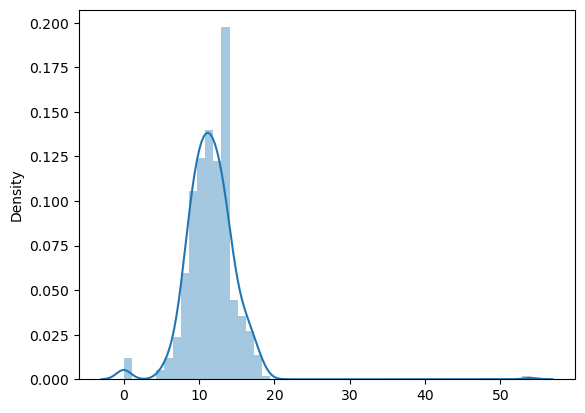

In [110]:
#heck:
sns.distplot(x =data.G2,  hist=True, kde=True)

Skewness handled using Sqrt X method

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\3651207679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Grade,  hist=True, kde=True)


<Axes: ylabel='Density'>

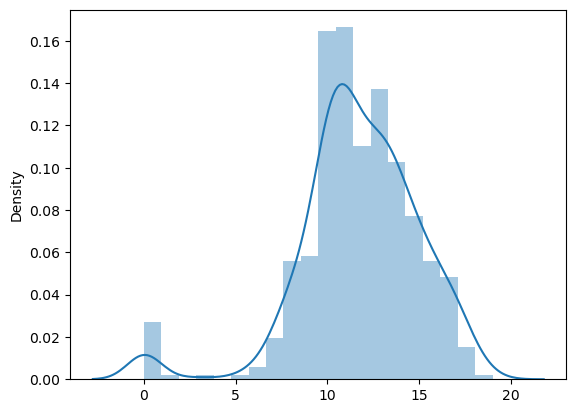

In [111]:
#For Grade:
sns.distplot(x =data.Grade,  hist=True, kde=True)

In [112]:
data.Grade.describe()

count    544.000000
mean      11.757353
std        3.274425
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: Grade, dtype: float64

In [113]:
np.log(1 + data.Grade).describe()

count    544.000000
mean       2.481255
std        0.461150
min        0.000000
25%        2.397895
50%        2.564949
75%        2.708050
max        2.995732
Name: Grade, dtype: float64

In [114]:
data.Grade=np.log(1+data.Grade)

C:\Users\Rowland\AppData\Local\Temp\ipykernel_8648\2180385753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =data.Grade,  hist=True, kde=True)


<Axes: ylabel='Density'>

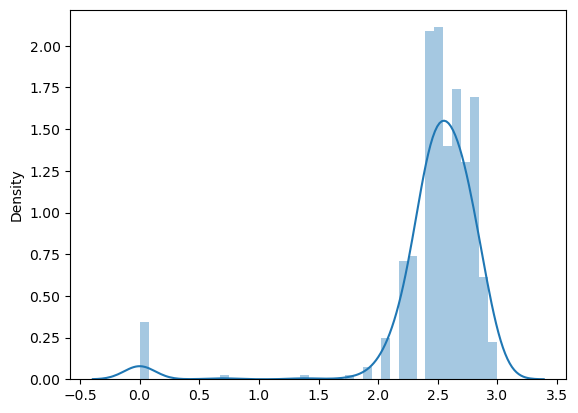

In [115]:
#Check:
sns.distplot(x =data.Grade,  hist=True, kde=True)

Skewness handled for Grade using log(1+X) method

In [116]:
data.describe()

,StudentID,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,Grade
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,13.064059,4.104720,1.224069,1.349290,0.132226,1.963685,1.759212,1.389589,0.867596,1.113668,1.093622,1.570577,11.510839,2.481255
std,0.582686,0.275764,0.281079,0.289799,0.322965,0.288850,0.322327,0.313778,0.299709,0.385243,0.976860,0.100236,3.445775,0.461150
min,11.552146,2.449490,1.000000,1.000000,0.000000,1.000000,1.000000,0.262364,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
25%,12.657584,4.000000,1.000000,1.000000,0.000000,2.000000,1.732051,1.098612,0.693147,0.693147,0.000000,1.517427,10.000000,2.397895
50%,13.212198,4.123106,1.000000,1.414214,0.000000,2.000000,1.732051,1.386294,0.693147,1.098612,1.098612,1.576359,11.000000,2.564949
75%,13.547047,4.242641,1.414214,1.414214,0.000000,2.236068,2.000000,1.609438,1.098612,1.386294,1.945910,1.624518,13.000000,2.708050
max,13.815195,7.745967,2.000000,2.000000,1.386294,3.872983,2.236068,1.791759,1.791759,1.791759,3.496508,1.715937,54.000000,2.995732


## Categorical Data
Categorical data refers to those data sets do not come in numerical but as object(i.e strings).
 Now in the given data sets we observed 20 columns of categorical data types.now we shall represent this datas using "Countplot" then encode using the label enconding style not specifying the inherent order of data entries.
 

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    float64
 1   school      544 non-null    object 
 2   sex         544 non-null    object 
 3   age         544 non-null    float64
 4   address     544 non-null    object 
 5   famsize     544 non-null    object 
 6   Pstatus     544 non-null    object 
 7   Medu        544 non-null    object 
 8   Fedu        544 non-null    object 
 9   Mjob        544 non-null    object 
 10  Fjob        544 non-null    object 
 11  reason      544 non-null    object 
 12  guardian    544 non-null    object 
 13  traveltime  544 non-null    float64
 14  studytime   544 non-null    float64
 15  failures    544 non-null    float64
 16  schoolsup   544 non-null    object 
 17  famsup      544 non-null    object 
 18  paid        544 non-null    object 
 19  activities  544 non-null    o

<Axes: xlabel='school', ylabel='count'>

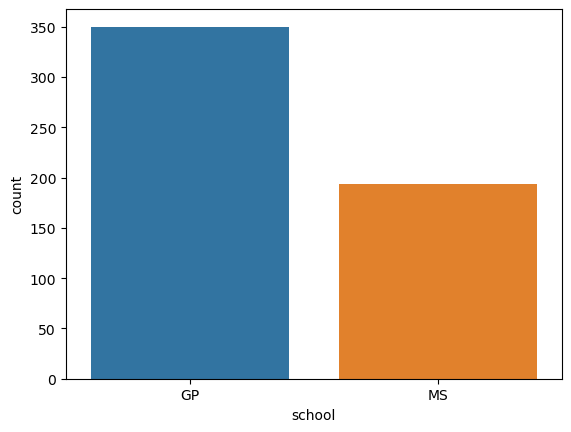

In [118]:
#For school:
sns.countplot(x="school", data=data)

In [119]:
#for school:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['school'])
data['school'] = encoded_data

<Axes: xlabel='sex', ylabel='count'>

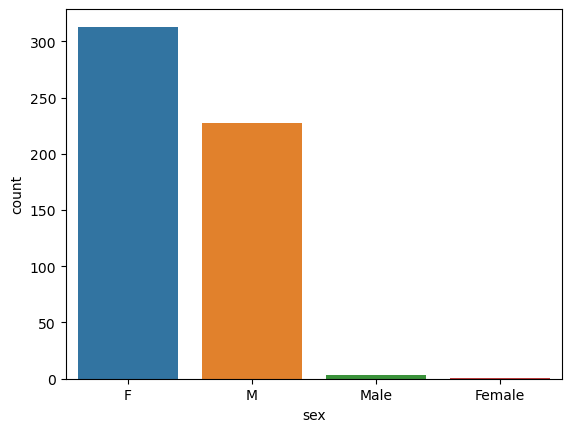

In [120]:
#for sex:
sns.countplot(x="sex", data=data)

In [121]:
#for sex:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['sex'])
data['sex'] = encoded_data

<Axes: xlabel='address', ylabel='count'>

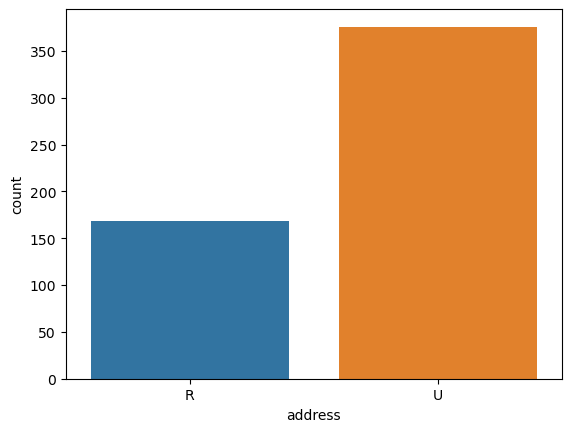

In [122]:
#For address:
sns.countplot(x="address", data=data)

In [123]:
#for address:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['address'])
data['address'] = encoded_data

<Axes: xlabel='famsize', ylabel='count'>

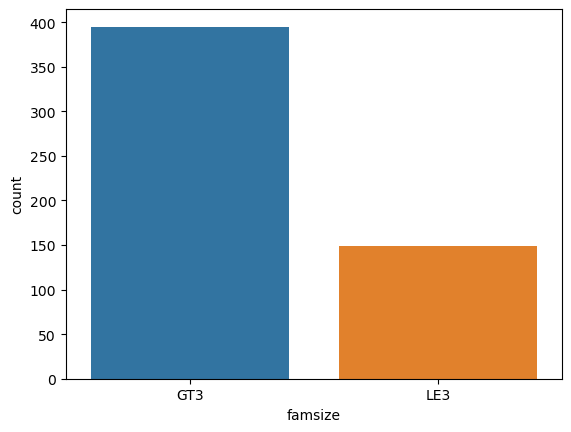

In [124]:
#for famsize
sns.countplot(x="famsize", data=data)

In [125]:
#for famsize:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['famsize'])
data['famsize'] = encoded_data

<Axes: xlabel='Pstatus', ylabel='count'>

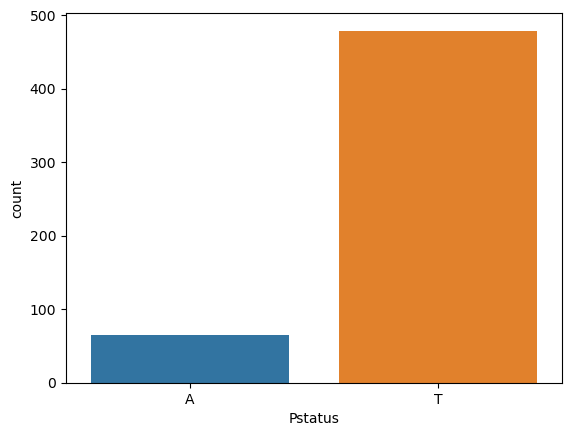

In [126]:
#For Pstatus:
sns.countplot(x="Pstatus", data=data)

In [127]:
#for Pstatus:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['Pstatus'])
data['Pstatus'] = encoded_data

<Axes: xlabel='Medu', ylabel='count'>

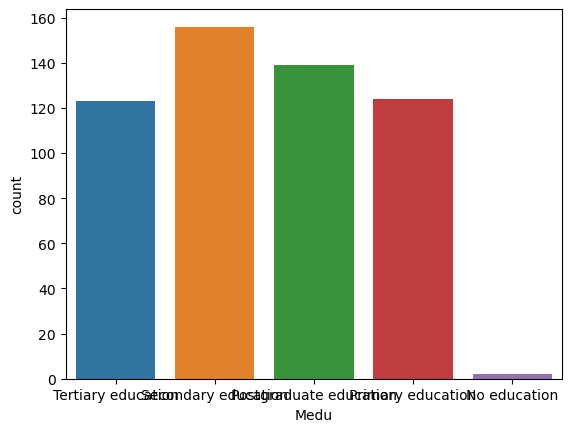

In [128]:
#For Medu:
sns.countplot(x="Medu", data=data)

In [129]:
#for Medu:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['Medu'])
data['Medu'] = encoded_data

<Axes: xlabel='Fedu', ylabel='count'>

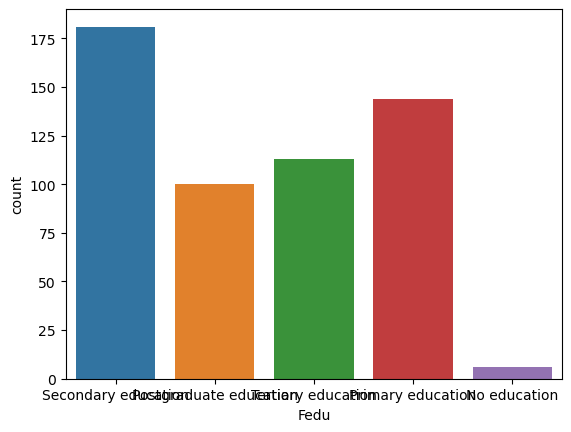

In [130]:
#For Fedu:
sns.countplot(x="Fedu", data=data)

In [131]:
#for Fedu:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['Fedu'])
data['Fedu'] = encoded_data

<Axes: xlabel='Mjob', ylabel='count'>

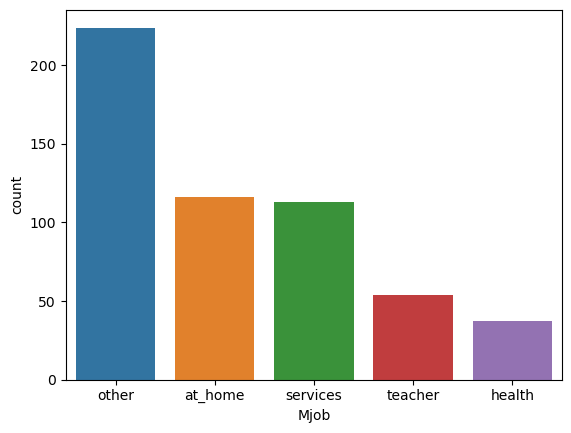

In [132]:
#for Mjob:
sns.countplot(x="Mjob", data=data)

In [133]:
#for Mjob:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['Mjob'])
data['Mjob'] = encoded_data

<Axes: xlabel='Fjob', ylabel='count'>

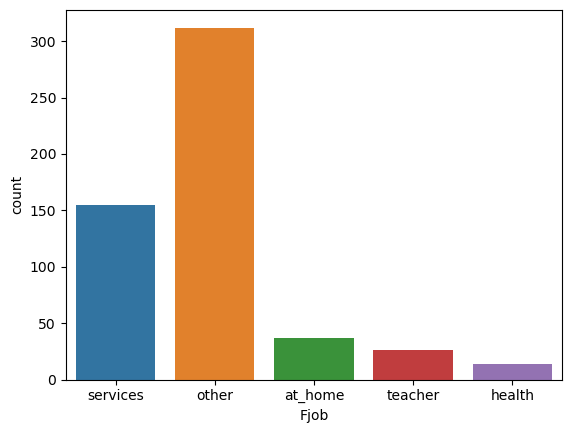

In [134]:
#For Fjob:
sns.countplot(x="Fjob", data=data)

In [135]:
#for Fjob:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['Fjob'])
data['Fjob'] = encoded_data

<Axes: xlabel='reason', ylabel='count'>

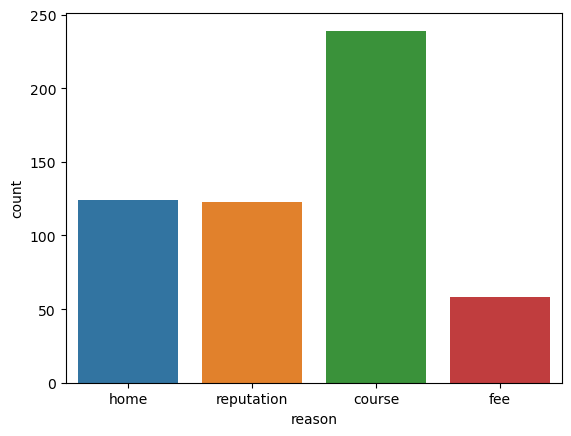

In [136]:
#For reason:
sns.countplot(x="reason", data=data)

In [137]:
#for reason:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['reason'])
data['reason'] = encoded_data

<Axes: xlabel='guardian', ylabel='count'>

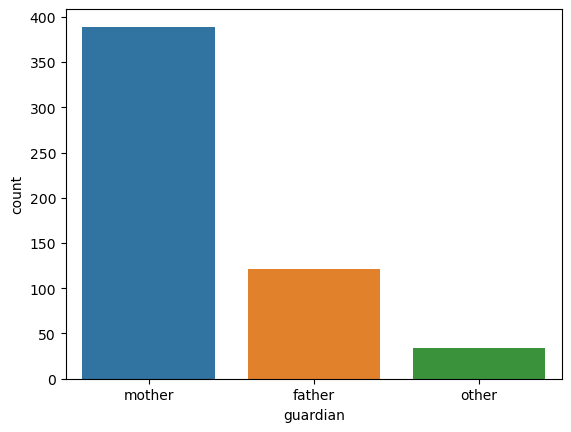

In [138]:
#For guardian:
sns.countplot(x="guardian", data=data)

In [139]:
#for guardian:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['guardian'])
data['guardian'] = encoded_data

<Axes: xlabel='schoolsup', ylabel='count'>

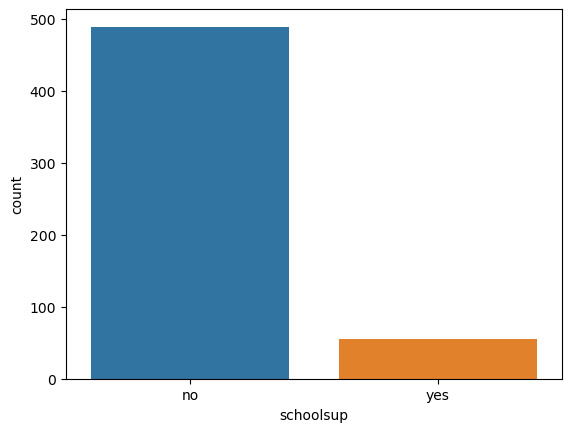

In [140]:
#for schoolsup:
sns.countplot(x="schoolsup", data=data)

In [141]:
#for schoolsup:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['schoolsup'])
data['schoolsup'] = encoded_data

<Axes: xlabel='famsup', ylabel='count'>

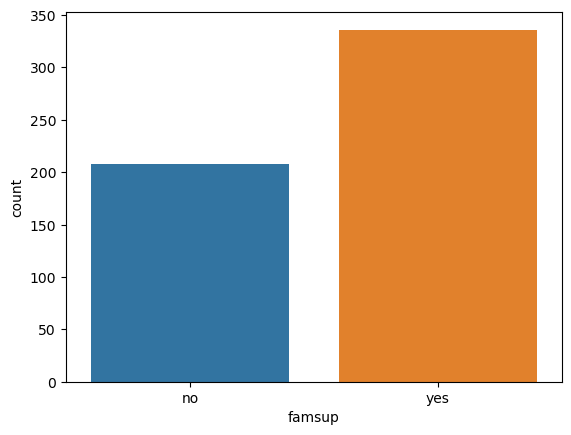

In [142]:
#For famsup:
sns.countplot(x="famsup", data=data)

In [143]:
#for famsup:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['famsup'])
data['famsup'] = encoded_data

<Axes: xlabel='paid', ylabel='count'>

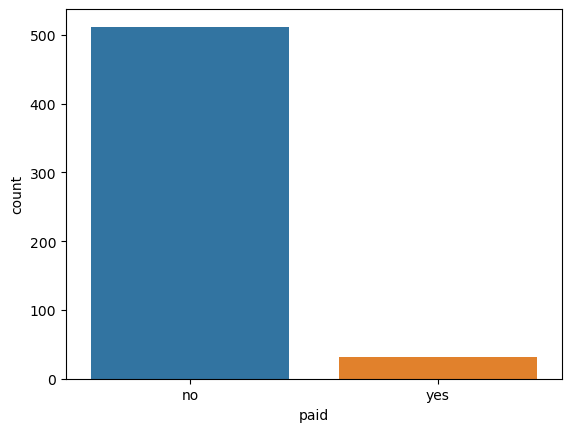

In [144]:
#for paid:
sns.countplot(x="paid", data=data)

In [145]:
#for paid:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['paid'])
data['paid'] = encoded_data

<Axes: xlabel='nursery', ylabel='count'>

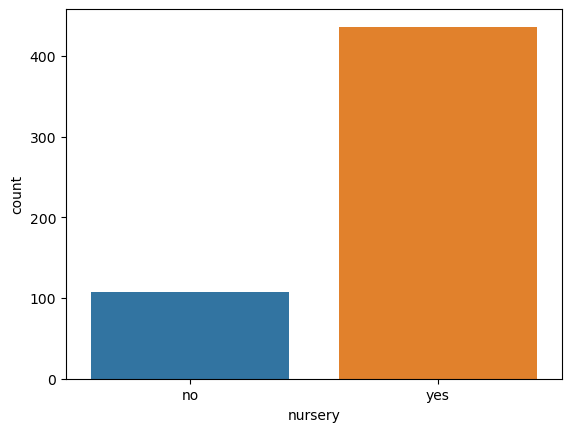

In [146]:
#For nursery:
sns.countplot(x="nursery", data=data)

In [147]:
#for nursery:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['nursery'])
data['nursery'] = encoded_data

<Axes: xlabel='higher', ylabel='count'>

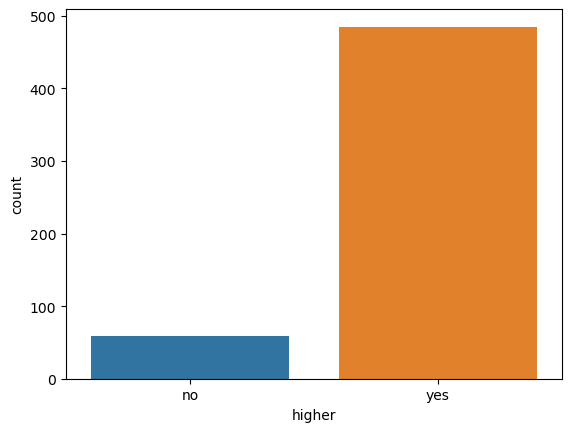

In [148]:
#For higher:
sns.countplot(x="higher", data=data)

In [149]:
#for higher:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['higher'])
data['higher'] = encoded_data

<Axes: xlabel='internet', ylabel='count'>

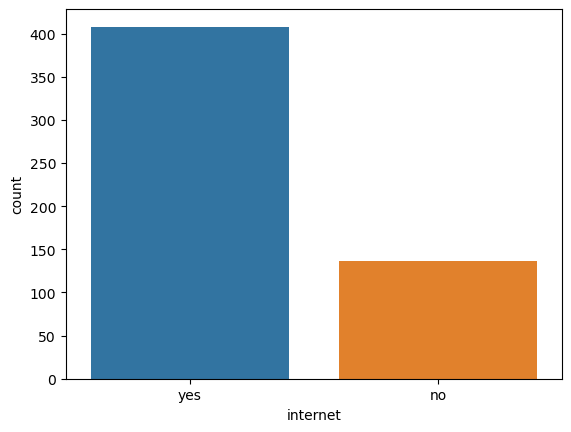

In [150]:
#For internet:
sns.countplot(x="internet", data=data)

In [151]:
#for internet:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['internet'])
data['internet'] = encoded_data

<Axes: xlabel='romantic', ylabel='count'>

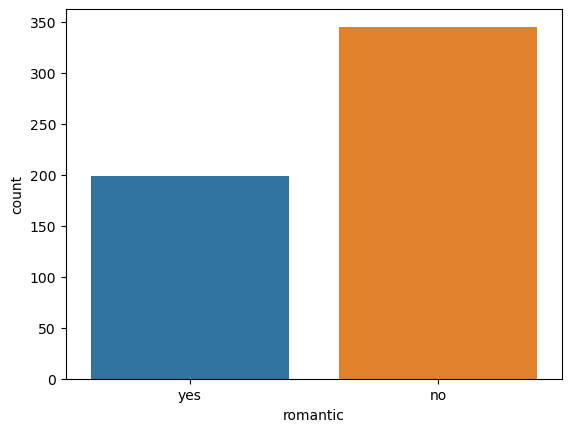

In [152]:
#For romantic:
sns.countplot(x="romantic", data=data)

In [153]:
#for romantic:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['romantic'])
data['romantic'] = encoded_data

<Axes: xlabel='health', ylabel='count'>

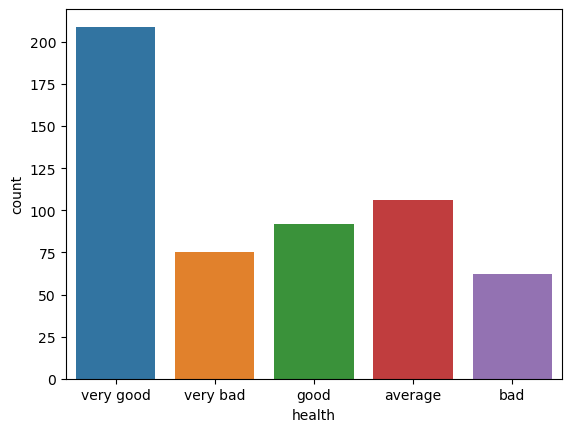

In [154]:
#For health:
sns.countplot(x="health", data=data)

In [155]:
#for health:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['health'])
data['health'] = encoded_data

<Axes: xlabel='activities', ylabel='count'>

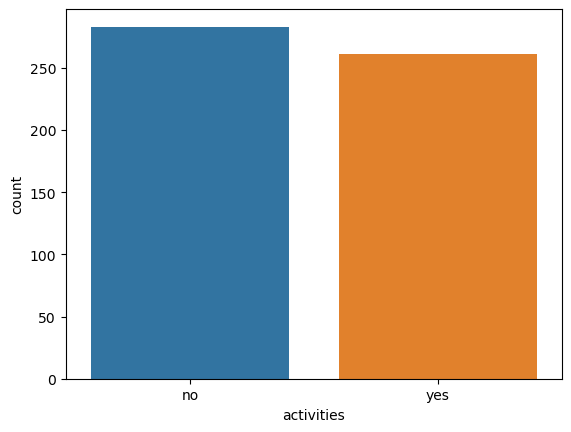

In [156]:
#For activities:
sns.countplot(x="activities", data=data)

In [157]:
#for activities:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data['activities'])
data['activities'] = encoded_data

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   544 non-null    float64
 1   school      544 non-null    int32  
 2   sex         544 non-null    int32  
 3   age         544 non-null    float64
 4   address     544 non-null    int32  
 5   famsize     544 non-null    int32  
 6   Pstatus     544 non-null    int32  
 7   Medu        544 non-null    int32  
 8   Fedu        544 non-null    int32  
 9   Mjob        544 non-null    int32  
 10  Fjob        544 non-null    int32  
 11  reason      544 non-null    int32  
 12  guardian    544 non-null    int32  
 13  traveltime  544 non-null    float64
 14  studytime   544 non-null    float64
 15  failures    544 non-null    float64
 16  schoolsup   544 non-null    int32  
 17  famsup      544 non-null    int32  
 18  paid        544 non-null    int32  
 19  activities  544 non-null    i

## Deleting non usable column

## Correlation Check

<Axes: >

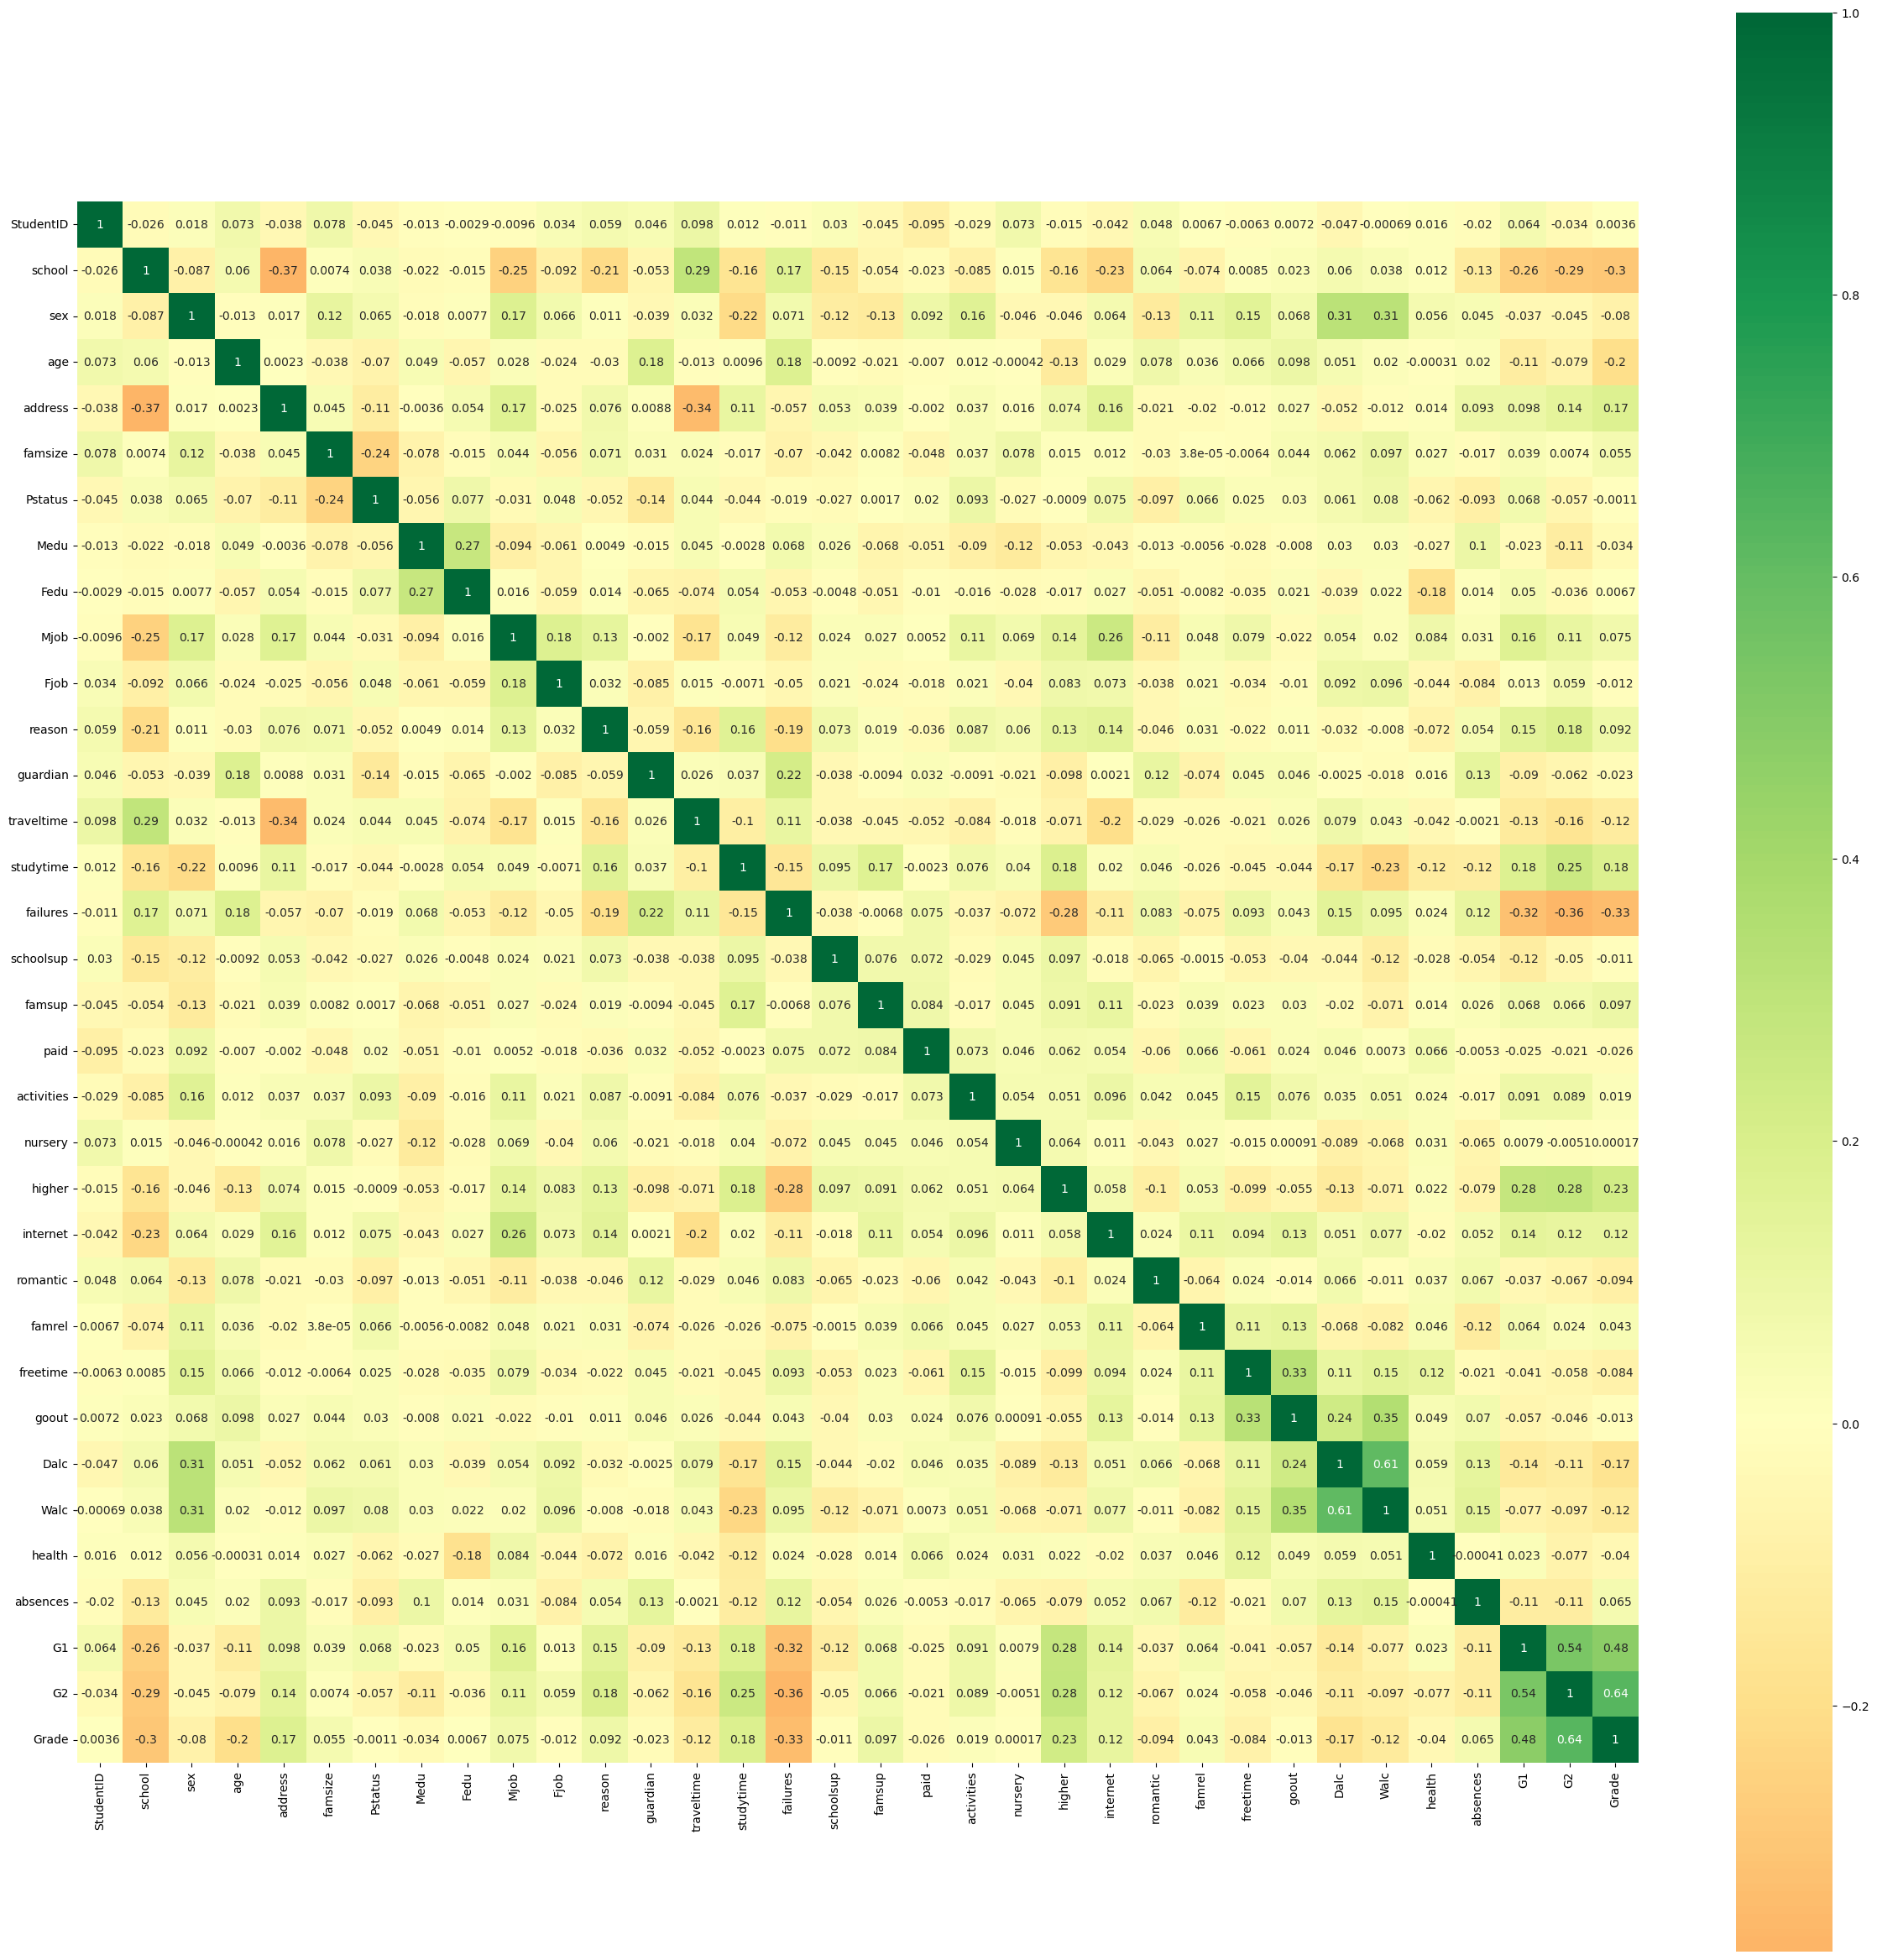

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [160]:
data.head()


,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,13.521492,0,0,4.242641,0,0,0,4,3,2,...,2.0,1.000000,0.693147,0.693147,0.693147,4,2.772589,1.601546,9.000000,2.397895
1,12.071054,1,0,4.123106,1,0,1,4,3,0,...,2.0,1.732051,1.386294,1.098612,1.098612,3,1.791759,1.517427,11.632163,2.484907
2,12.638702,0,0,3.872983,1,1,1,4,3,3,...,2.0,2.000000,1.609438,0.693147,0.693147,4,1.609438,1.601546,11.000000,2.484907
3,12.729466,1,0,4.123106,1,0,1,3,3,2,...,2.0,2.236068,1.386294,0.693147,0.693147,4,1.609438,1.517427,9.000000,2.397895
4,12.672849,0,0,4.123106,1,0,1,1,1,2,...,2.0,1.414214,0.693147,0.693147,0.693147,2,0.000000,1.624518,13.000000,2.639057


## Data Successfully Cleaned !!!

# Linear Regression

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X = data.drop("Grade", axis=1)
y = data['Grade']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X_train.shape

(435, 33)

In [193]:
X_test.shape

(109, 33)

In [194]:
X_train.describe()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,13.046209,0.363218,0.873563,4.103207,0.685057,0.266667,0.878161,2.455172,2.540230,1.937931,...,0.351724,1.957547,1.754977,1.383665,0.870738,1.108733,2.409195,1.110955,1.571238,11.642833
std,0.582656,0.481481,1.002354,0.300567,0.465028,0.442726,0.327476,1.117391,1.049518,1.241862,...,0.478058,0.303910,0.322803,0.321200,0.300257,0.387993,1.551841,0.987560,0.106019,3.535743
min,11.591321,0.000000,0.000000,2.449490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.262364,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
25%,12.618094,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,2.000000,1.732051,1.098612,0.693147,0.693147,1.000000,0.000000,1.517427,10.000000
50%,13.144823,0.000000,0.000000,4.123106,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,...,0.000000,2.000000,1.732051,1.386294,0.693147,1.098612,3.000000,1.098612,1.576359,12.000000
75%,13.545826,1.000000,2.000000,4.242641,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,1.000000,2.236068,2.000000,1.609438,1.098612,1.386294,4.000000,1.945910,1.624518,13.000000
max,13.815195,1.000000,3.000000,7.745967,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,...,1.000000,3.872983,2.236068,1.791759,1.791759,1.791759,4.000000,3.496508,1.715937,54.000000


In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
model =LinearRegression()

In [197]:
model.fit(X_train,y_train)

LinearRegression()

In [198]:
y_pred = model.predict(X_train)

In [199]:
from sklearn.metrics import r2_score, mean_squared_error

In [200]:
r2_score(y_train,y_pred)

0.5265365386297283

In [201]:
y_test_pred = model.predict(X_test)

In [202]:
r2_score(y_test,y_test_pred)

0.4561620593694957

In [203]:
#mean sqaure root:
mean_squared_error(y_train,y_pred)

0.08769630638779319

In [218]:
mean_squared_error(y_test,y_test_pred)


0.1717571423450356